In [1]:
import os
import numpy as np
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.optimizers import Adam, RMSprop,  Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.models import load_model
from keras.callbacks import EarlyStopping
from tensorflow.keras import models, layers
from tensorflow.keras.saving import save_model
from tensorflow.keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc, confusion_matrix

from utils.utils import plot_line, plot_metrics, plot_confusion_matrix

In [75]:
%load_ext autoreload
%autoreload 2
%run utils/utils.py

In [2]:
import keras
keras.__version__

'2.12.0'

In [3]:
# Define the data directory and the classes
data_dir = '..\dataset'
classes = ('REAL', 'FAKE')

In [4]:
# Create image generators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Load the training and testing images
train_images = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    subset="training",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

val_images = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    subset="validation",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_images = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 80000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [6]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), padding="same", activation="relu", input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(256, (5, 5), strides=(1, 1), padding="same", activation="relu"))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(384, (3, 3), strides=(1, 1), padding="same", activation="relu"))
    model.add(layers.Conv2D(384, (3, 3), strides=(1, 1), padding="same", activation="relu"))
    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding="same", activation="relu"))
    model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation="relu"))
    model.add(layers.Dense(4096, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    return model

In [7]:
callback = EarlyStopping(monitor='val_loss', patience=3)

In [30]:
model = create_model()
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [31]:
history = model.fit(train_images, epochs=50, validation_data=val_images, callbacks=[callback])

Epoch 1/50
2500/2500 [==============================] - 421s 168ms/step - loss: 0.4432 - accuracy: 0.7858 - val_loss: 0.3863 - val_accuracy: 0.8288
Epoch 2/50
2500/2500 [==============================] - 358s 143ms/step - loss: 0.3420 - accuracy: 0.8501 - val_loss: 0.3042 - val_accuracy: 0.8699
Epoch 3/50
2500/2500 [==============================] - 357s 143ms/step - loss: 0.3075 - accuracy: 0.8691 - val_loss: 0.2888 - val_accuracy: 0.8758
Epoch 4/50
2500/2500 [==============================] - 357s 143ms/step - loss: 0.2850 - accuracy: 0.8802 - val_loss: 0.2901 - val_accuracy: 0.8769
Epoch 5/50
2500/2500 [==============================] - 363s 145ms/step - loss: 0.2703 - accuracy: 0.8859 - val_loss: 0.2524 - val_accuracy: 0.8950
Epoch 6/50
2500/2500 [==============================] - 361s 144ms/step - loss: 0.2576 - accuracy: 0.8916 - val_loss: 0.2572 - val_accuracy: 0.8931
Epoch 7/50
2500/2500 [==============================] - 359s 143ms/step - loss: 0.2476 - accuracy: 0.8973 - val_

In [32]:
save_model(model, '../models/ALEXNET_MODEL')
model = load_model('../models/ALEXNET_MODEL')
hist_df = pd.DataFrame(history.history)
hist_df.columns = ['train_loss', 'train_acc', 'validation_loss', 'validation_acc']
hist_df.index = hist_df.index + 1
hist_df.to_csv('../history/ALEXNET.csv')

INFO:tensorflow:Assets written to: ../models/ALEXNET_MODEL\assets


INFO:tensorflow:Assets written to: ../models/ALEXNET_MODEL\assets


In [33]:
loss, accuracy = model.evaluate(test_images)

625/625 [==============================] - 425s 681ms/step - loss: 0.2014 - accuracy: 0.9208


In [41]:
#RMSprop
model2 = create_model()
optimizer = RMSprop(learning_rate=0.0001)
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history2 = model2.fit(train_images, epochs=50, validation_data=val_images, callbacks=[callback])

Epoch 1/50
2500/2500 [==============================] - 509s 203ms/step - loss: 0.4674 - accuracy: 0.7784 - val_loss: 0.3878 - val_accuracy: 0.8226
Epoch 2/50
2500/2500 [==============================] - 509s 204ms/step - loss: 0.3781 - accuracy: 0.8376 - val_loss: 0.3303 - val_accuracy: 0.8578
Epoch 3/50
2500/2500 [==============================] - 524s 210ms/step - loss: 0.3574 - accuracy: 0.8512 - val_loss: 0.3306 - val_accuracy: 0.8661
Epoch 4/50
2500/2500 [==============================] - 517s 207ms/step - loss: 0.3379 - accuracy: 0.8612 - val_loss: 0.2883 - val_accuracy: 0.8867
Epoch 5/50
2500/2500 [==============================] - 512s 205ms/step - loss: 0.3247 - accuracy: 0.8680 - val_loss: 0.2908 - val_accuracy: 0.8795
Epoch 6/50
2500/2500 [==============================] - 552s 221ms/step - loss: 0.3142 - accuracy: 0.8714 - val_loss: 0.3026 - val_accuracy: 0.8812
Epoch 7/50
2500/2500 [==============================] - 549s 219ms/step - loss: 0.3170 - accuracy: 0.8752 - val_

In [46]:
#Adamax
model3 = create_model()
optimizer = Adamax(learning_rate=0.0001)
model3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history3 = model3.fit(train_images, epochs=50, validation_data=val_images, callbacks=[callback])

Epoch 1/50
2500/2500 [==============================] - 388s 155ms/step - loss: 0.4497 - accuracy: 0.7834 - val_loss: 0.3952 - val_accuracy: 0.8139
Epoch 2/50
2500/2500 [==============================] - 406s 162ms/step - loss: 0.3500 - accuracy: 0.8479 - val_loss: 0.3129 - val_accuracy: 0.8643
Epoch 3/50
2500/2500 [==============================] - 1154s 461ms/step - loss: 0.3137 - accuracy: 0.8649 - val_loss: 0.2816 - val_accuracy: 0.8811
Epoch 4/50
2500/2500 [==============================] - 2122s 849ms/step - loss: 0.2882 - accuracy: 0.8773 - val_loss: 0.2616 - val_accuracy: 0.8916
Epoch 5/50
2500/2500 [==============================] - 493s 197ms/step - loss: 0.2737 - accuracy: 0.8845 - val_loss: 0.2663 - val_accuracy: 0.8864
Epoch 6/50
2500/2500 [==============================] - 394s 158ms/step - loss: 0.2601 - accuracy: 0.8912 - val_loss: 0.3124 - val_accuracy: 0.8618
Epoch 7/50
2500/2500 [==============================] - 384s 154ms/step - loss: 0.2516 - accuracy: 0.8951 - va

INFO:tensorflow:Assets written to: ../models/ALEXNET_MODEL\assets


INFO:tensorflow:Assets written to: ../models/ALEXNET_MODEL\assets


In [8]:
#Nadam
model4 = create_model()
optimizer = Nadam(learning_rate=0.0001)
model4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history4 = model4.fit(train_images, epochs=50, validation_data=val_images, callbacks=[callback])

Epoch 1/50
2500/2500 [==============================] - 4511s 2s/step - loss: 0.4300 - accuracy: 0.7965 - val_loss: 0.3498 - val_accuracy: 0.8458
Epoch 2/50
2500/2500 [==============================] - 1398s 559ms/step - loss: 0.3264 - accuracy: 0.8587 - val_loss: 0.3001 - val_accuracy: 0.8763
Epoch 3/50
2500/2500 [==============================] - 682s 273ms/step - loss: 0.2873 - accuracy: 0.8779 - val_loss: 0.2949 - val_accuracy: 0.8766
Epoch 4/50
2500/2500 [==============================] - 647s 259ms/step - loss: 0.2677 - accuracy: 0.8878 - val_loss: 0.2578 - val_accuracy: 0.8918
Epoch 5/50
2500/2500 [==============================] - 646s 258ms/step - loss: 0.2523 - accuracy: 0.8947 - val_loss: 0.2612 - val_accuracy: 0.8921
Epoch 6/50
2500/2500 [==============================] - 661s 264ms/step - loss: 0.2390 - accuracy: 0.9004 - val_loss: 0.2577 - val_accuracy: 0.8949
Epoch 7/50
2500/2500 [==============================] - 650s 260ms/step - loss: 0.2291 - accuracy: 0.9061 - val_l

In [9]:
loss_4, accuracy_4 = model4.evaluate(test_images)

625/625 [==============================] - 403s 645ms/step - loss: 0.1655 - accuracy: 0.9343


In [13]:
save_model(model4, '../models/ALEXNET_MODEL_NADAM')
model_nadam = load_model('../models/ALEXNET_MODEL_NADAM')
hist_df4 = pd.DataFrame(history4.history)
hist_df4.columns = ['train_loss', 'train_acc', 'validation_loss', 'validation_acc']
hist_df4.index = hist_df4.index + 1
hist_df4.to_csv('../history/ALEXNET_NADAM.csv')

INFO:tensorflow:Assets written to: ../models/ALEXNET_MODEL_NADAM\assets


INFO:tensorflow:Assets written to: ../models/ALEXNET_MODEL_NADAM\assets


In [14]:
print(f"Loss : {loss_4}")
print(f"Accuracy : {accuracy_4}")

Loss : 0.16551083326339722
Accuracy : 0.9343000054359436


In [17]:
y_true_nadam = []
y_pred_nadam = []
for batch_id in range(len(test_images)):
    batch_images = test_images[batch_id][0]
    batch_labels = test_images[batch_id][1]
    batch_predictions = model_nadam.predict(batch_images)
    batch_predictions = (batch_predictions > 0.5).astype(int)
    y_true_nadam.extend(batch_labels)
    y_pred_nadam.extend(batch_predictions)

1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 42ms/step


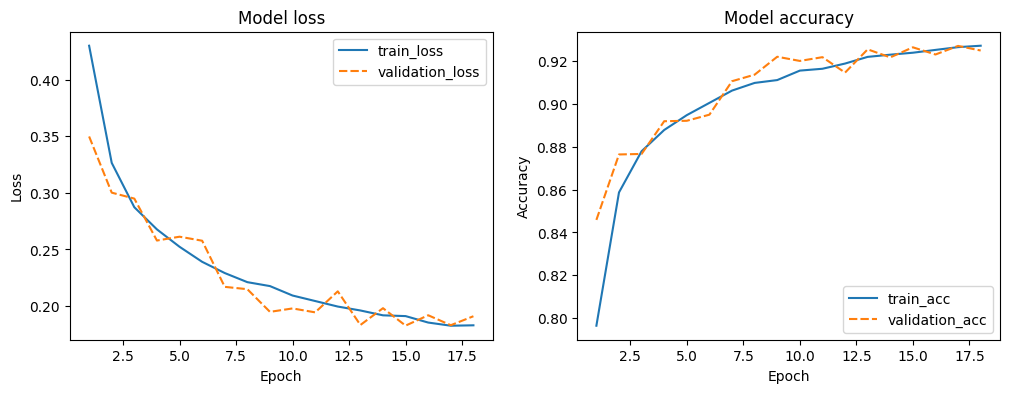

In [16]:
plot_line(hist_df4)

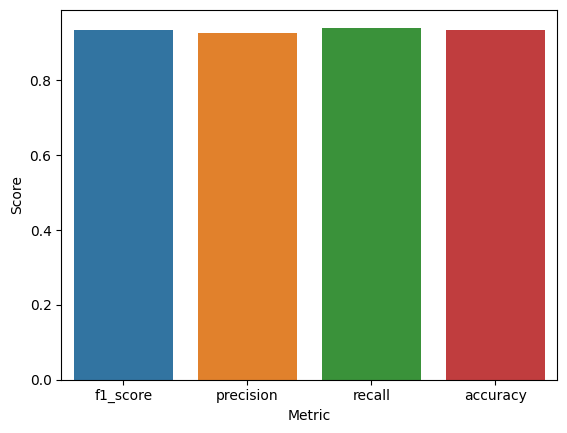

In [18]:
plot_metrics(y_true_nadam, y_pred_nadam)

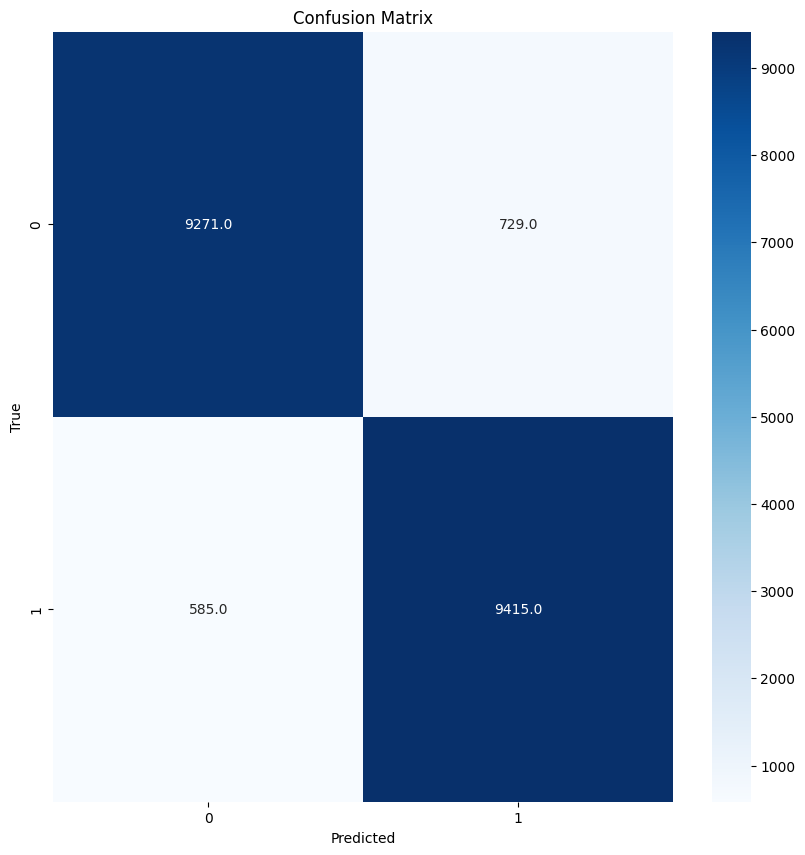

In [19]:
plot_confusion_matrix(y_true_nadam, y_pred_nadam)